In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import util, exposure as exp
from PIL import Image
import napari
import pyvista as pv


In [2]:
file_path = r'C:\Users\userl\Documents\Github\ML\SeismicProject\data\dataset.h5'
f= h5py.File(file_path,'r')

In [3]:
f.keys()

<KeysViewHDF5 ['column', 'direction', 'features', 'label', 'line_number', 'pixel_depth']>

In [4]:
print(f['features'].shape)
print(f['label'].shape)
print(f['line_number'].shape)
print(f['pixel_depth'].shape)
print(f['direction'].shape)
print(f['column'].shape)

(601, 1501, 481, 1)
(601, 1501, 481)
(601,)
(601,)
(601,)
(601,)


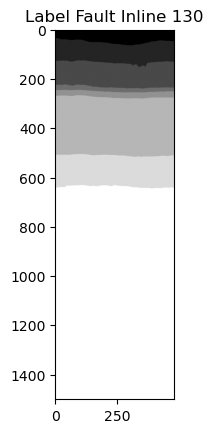

In [5]:
plt.imshow(f['label'][130, :, :], cmap='gray', alpha=1)
plt.title("Label Fault Inline 130")
plt.show()


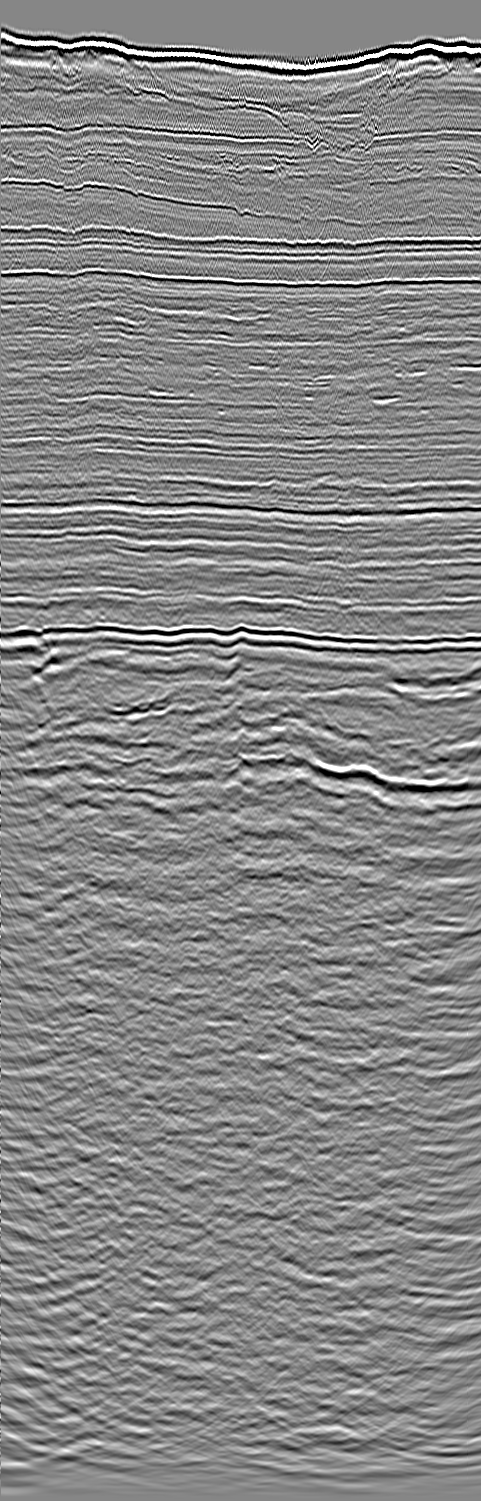

In [12]:
image = f['features'][130, :, :, 0]
pmin, pmax = np.percentile(image, (1., 100.0 - 1.0))
image = exp.rescale_intensity(image, in_range=(pmin, pmax), out_range=(0, 255))
image = exp.rescale_intensity(image, in_range=(0, 255), out_range=(0, 255)).astype(np.uint8)

Image.fromarray(image)

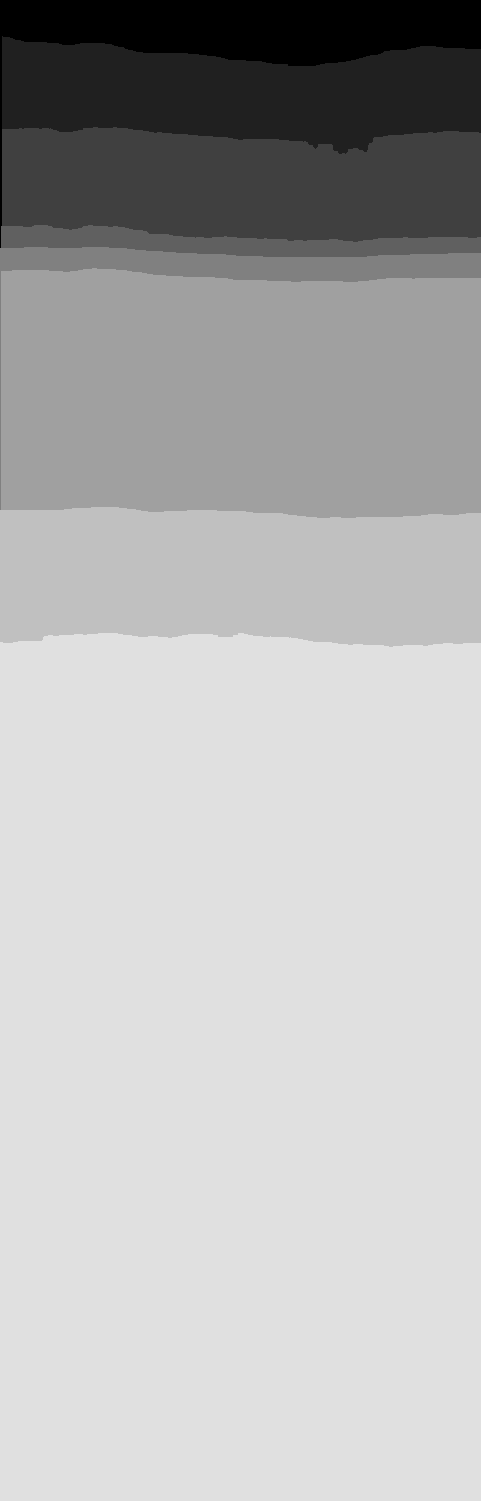

In [13]:
Image.fromarray(f['label'][130, :, :] * 32)


In [ ]:
#Model 2D & 3D dari Data Seismik (NAPARI)
Features = f['features'][:].squeeze()
labels = f['label'][:].squeeze()
viewer = napari.view_image(Features, name='Seismic 3D', colormap='gray', rendering='iso')
napari.run()

In [30]:
#Model 2D & 3D dari Data Seismik (PyVista)
#Features = f['features'][:].squeeze()
#plotter = pv.Plotter()
#plotter.add_volume(Features, opacity='sigmoid', cmap='gray')
#plotter.show()
